/state/partition1/job-38964973/ipykernel_1811033/526645318.py:24: RuntimeWarning: divide by zero encountered in log
  F = -np.log(hist)


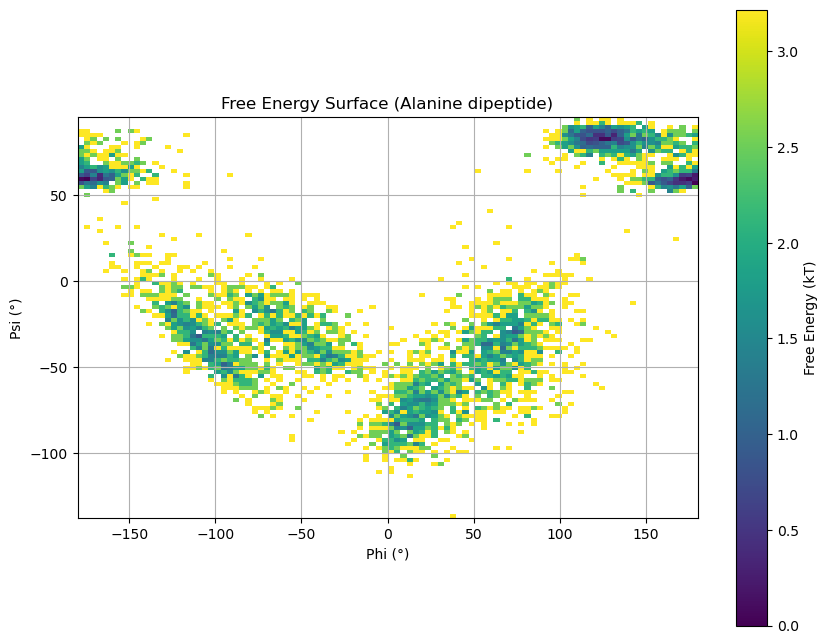

In [21]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load your MD trajectory and topology
traj = md.load('adpsim.trr', top='adpsim.gro')

# Define phi and psi atom indices for Alanine dipeptide within the range 0 to 22
phi_indices = [4, 6, 10, 12]
psi_indices = [6, 10, 12, 18]

# Calculate phi and psi dihedral angles
phi_angles = md.compute_dihedrals(traj, [phi_indices])
psi_angles = md.compute_dihedrals(traj, [psi_indices])

# Convert angles from radians to degrees
phi_degrees = np.asarray(np.rad2deg(phi_angles))[:,0]
psi_degrees = np.asarray(np.rad2deg(psi_angles))[:,0]

# Create 2D histogram for the free energy surface
hist, xedges, yedges = np.histogram2d(phi_degrees, psi_degrees, bins=100)

# Calculate free energy (F) from the histogram
F = -np.log(hist)
F -= np.nanmin(F)  # Set the minimum to 0 for stability

# Plot the free energy surface
plt.figure(figsize=(10, 8))
plt.imshow(F.T, origin='lower', cmap='viridis', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('Phi (°)')
plt.ylabel('Psi (°)')
plt.title('Free Energy Surface (Alanine dipeptide)')
plt.grid(True)
plt.show()
